In [43]:
from core import *
import networkx as nx
import time
import pandas as pd

# Leitura das instâncias 

- Instância toy1 (toy1_instance): grafo valorado com custos positivos e não direcionado. Exemplo de entrada
para ser usada pelos algoritmos de caminho mínimo e árvore geradora mínima.

In [2]:
toy1_instance = {
    "a": {"b": 60, "c": 54, "d": 42},
    "b": {"a": 60, "d": 71, "f": 29},
    "c": {"a": 54, "d": 56, "e": 67},
    "d": {"a": 42, "b": 71, "c": 56, "f": 52, "g": 87, "e": 26},
    "e": {"c": 67, "d": 26, "g": 70, "i": 73},
    "f": {"b": 29, "d": 52, "g": 20, "h": 25},
    "g": {"d": 87, "e": 70, "f": 20, "h": 36, "j": 32, "i": 59},
    "h": {"f": 25, "g": 36, "j": 25},
    "i": {"e": 73, "g": 59, "j": 26},
    "j": {"g": 32, "h": 25, "i": 26},
}

- Instância toy2: grafo de fluxo valorado com custos positivos e direcionado. Exemplo de
entrada para ser usada pelo algoritmo de fluxo (Ford-Fulkerson).

In [3]:
toy2_instance = {
    "1": {"2": 3, "3": 3},
    "2": {"3": 1, "4": 3, "5": 2},
    "3": {"4": 5},
    "4": {"6": 6},
    "5": {"4": 3, "6": 3},
}

Instâncias de benchmarks disponíveis na literatura: exemplos de entrada para serem aplicadas
aos algoritmos de caminho mínimo e árvore geradora mínima.
Os algoritmos devem ser executados com pelo menos 3 diferentes instâncias do site
http://www.dis.uniroma1.it/challenge9/download.shtml. Neste site existe uma tabela com arquivos
de dados referentes a 12 redes de estradas dos USA.

Sugiro escolher as três menores: New York
(NY), San Francisco (BAY) e Colorado (COL). Existem dois tipos de rede para cada cidade citada
acima: uma delas possui informações de distância (coluna Distance graph da tabela) e a outra,
tempo de viagem (coluna Travel Time graph da tabela). Sugiro aplicar suas implementações apenas
nas redes de distâncias. Informações do formato dos arquivos de dados podem ser encontradas em
http://www.dis.uniroma1.it/challenge9/format.shtml.

In [6]:
ny_path = "USA-road-d.NY.gr.gz"
san_path = "USA-road-d.BAY.gr.gz"
col_path = "USA-road-d.COL.gr.gz"

In [9]:
download_data(
    "http://www.diag.uniroma1.it/challenge9/data/USA-road-d/USA-road-d.NY.gr.gz",
    ny_path,
)

download_data(
    "http://www.diag.uniroma1.it/challenge9/data/USA-road-d/USA-road-d.BAY.gr.gz",
    san_path,
)
download_data(
    "http://www.diag.uniroma1.it/challenge9/data/USA-road-d/USA-road-d.BAY.gr.gz",
    col_path,
)

## Plot dos gráficos mais simples

### Toy 1

In [30]:
# Create an empty graph
graph_toy1_instance = nx.Graph()

# Add nodes from adjacency list
graph_toy1_instance.add_nodes_from(toy1_instance.keys())

# Add edges from adjacency list
for node, neighbors in toy1_instance.items():
    for neighbor, weight in neighbors.items():
        graph_toy1_instance.add_edge(node, neighbor, weight=weight)

In [31]:
graph_toy1_instance

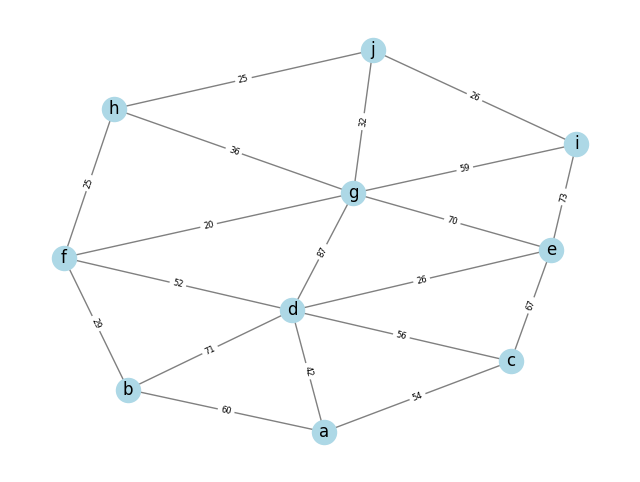

In [5]:
plot_graph(graph_toy1_instance)

### Toy 2

In [6]:
graph_toy2_instance = nx.DiGraph()

# Add nodes from adjacency list
graph_toy2_instance.add_nodes_from(toy2_instance.keys())

# Add edges from adjacency list
for node, neighbors in toy2_instance.items():
    for neighbor, weight in neighbors.items():
        graph_toy2_instance.add_edge(node, neighbor, weight=weight)


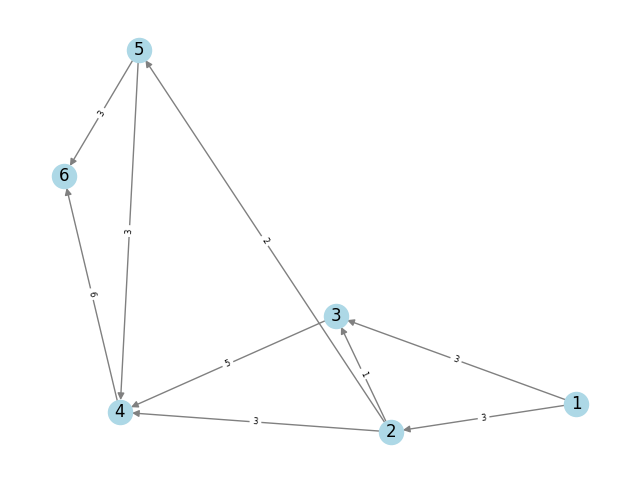

In [7]:
plot_graph(graph_toy2_instance, arrows=True)

## Djikstra

````python

vINI = vértice inicial
d(vINI, vINI) = 0
d(vINI, i) = INFINITO, para todo i, i pertence a V – {vINI}
fechado = vazio
aberto = V
anterior(i) = 0, para todo i, i pertence a V
enquanto(aberto ≠ vazio) {
    k = vértice pertencente a aberto, mais próximo do vértice inicial
    fechado = fechado + k; 
    aberto = aberto – k;
    para cada vizinho i de k que está em aberto faça{
        custo = min{d(vINI, i), d(vINI,k) + c(k,i)}

        se (custo < d(vINI, i)) então
            d(vINI, i) = custo; anterior(i) = k

    }
}

````

### TOY 1

In [15]:
start_node = "a"
start_time = time.time()
distances, previous = dijkstra(toy1_instance, start_node)
end_time = time.time()

In [16]:
print("Time between function executions:", end_time - start_time, "seconds")

Time between function executions: 0.0009984970092773438 seconds


In [22]:

print("Shortest distances from node", start_node + ":")
for node, distance in distances.items():
    print("Node", node + ":", distance)

print("\nPrevious nodes:")
for node, prev_node in previous.items():
    print("Node", node + ":", prev_node)

total = sum(distances.values())

print("\nSum of costs:")
print(total)

print("\nEdges:")
num_edges = graph.number_of_edges()


print("\nNodes:")
num_edges = graph.number_of_edges()

Shortest distances from node a:
Node a: 0
Node b: 60
Node c: 54
Node d: 42
Node e: 68
Node f: 89
Node g: 109
Node h: 114
Node i: 141
Node j: 139

Previous nodes:
Node a: None
Node b: a
Node c: a
Node d: a
Node e: d
Node f: b
Node g: f
Node h: f
Node i: e
Node j: h
816


### New york

In [33]:
graph = read_gr_graph(ny_path.replace(".gz", ''))

In [35]:
graph_ny = nx.to_dict_of_dicts(graph)

In [41]:
graph_ny = {
    node1: {
        node2: subdict['weight'] for node2, subdict in nested_dict.items()
    } for node1, nested_dict in graph_ny.items()
}

In [56]:
start_node = 1
start_time = time.time()
distances, previous = dijkstra(graph_ny, '1')
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

KeyboardInterrupt: 

In [ ]:
distances_df = pd.DataFrame({'Node': list(distances.keys()), 'Distance': list(distances.values())})
distances_df.to_csv('distances_ny.csv', index=False)

previous_df = pd.DataFrame({'Node': list(previous.keys()), 'Previous': list(previous.values())})
previous_df.to_csv('previous_ny.csv', index=False)

### San Francisco

In [ ]:
graph = read_gr_graph(san_path.replace(".gz", ''))

NameError: name 'sa_path' is not defined

In [ ]:
graph_sa = nx.to_dict_of_dicts(graph)

In [ ]:
graph_sa = {
    node1: {
        node2: subdict['weight'] for node2, subdict in nested_dict.items()
    } for node1, nested_dict in graph_sa.items()
}

In [ ]:
start_node = 1
start_time = time.time()
distances, previous = dijkstra(graph_sa, '1')
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

In [ ]:
distances_df = pd.DataFrame({'Node': list(distances.keys()), 'Distance': list(distances.values())})
distances_df.to_csv('distances_san.csv', index=False)

previous_df = pd.DataFrame({'Node': list(previous.keys()), 'Previous': list(previous.values())})
previous_df.to_csv('previous_san.csv', index=False)

### Colorado

In [ ]:
graph = read_gr_graph(col_path.replace(".gz", ''))

In [ ]:
graph_col = nx.to_dict_of_dicts(graph)

In [ ]:
graph_col = {
    node1: {
        node2: subdict['weight'] for node2, subdict in nested_dict.items()
    } for node1, nested_dict in graph_col.items()
}

In [ ]:
start_node = 1
start_time = time.time()
distances, previous = dijkstra(graph_col, '1')
end_time = time.time()
print("Time between function executions:", end_time - start_time, "seconds")

In [ ]:
distances_df = pd.DataFrame({'Node': list(distances.keys()), 'Distance': list(distances.values())})
distances_df.to_csv('distances_col.csv', index=False)

previous_df = pd.DataFrame({'Node': list(previous.keys()), 'Previous': list(previous.values())})
previous_df.to_csv('previous_col.csv', index=False)

## Resultados

<table>
  <tr>
    <td>Instância</td>
    <th colspan="2">Grafo</th>
    <th colspan="2">CM</th>
    <th colspan="2">AGM</th>
    <th colspan="2">FM</th>
  </tr>
  <tr>
  <td></td>
    <td>n</td>
    <td>m</td>
    <td>Custo</td>
    <td>Tempo (s)</td>
        <td>Custo</td>
    <td>Tempo (s)</td>
        <td>Custo</td>
    <td>Tempo (s)</td>
  </tr>
  <tr>
    <td>Toy 1</td>
    <td></td>
    <td></td>
    <td>816</td>
    <td>0.0009984970092773438</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    </tr>
      <tr>
    <td>New York</td>
    <td></td>
    <td></td>
    <td>816</td>
    <td>0.0009984970092773438</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    </tr>
    <tr>
      <td>San Francisco</td>
      <td></td>
      <td></td>
      <td>816</td>
      <td>0.0009984970092773438</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Colorado</td>
      <td></td>
      <td></td>
      <td>816</td>
      <td>0.0009984970092773438</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
</table>